In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew,kurtosis
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [50]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [54]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
# Drop the species column
iris_df = iris_df.drop(columns=['petal width (cm)'])

In [26]:
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)
0                5.1               3.5                1.4
1                4.9               3.0                1.4
2                4.7               3.2                1.3
3                4.6               3.1                1.5
4                5.0               3.6                1.4


In [28]:
from sklearn.cluster import KMeans

In [30]:
# KMeans Explained
# KMeans is a clustering algorithm that aims to partition n observations into k clusters,
# where each observation belongs to the cluster with the nearest mean (centroid).
# The algorithm iteratively assigns data points to the nearest centroid and then updates
# the centroids based on the assigned points. This process continues until convergence

# Suitability for Iris Dataset
# KMeans is suitable for the Iris dataset because it has well-defined clusters based
# on the sepal length, sepal width, petal length, and petal width features.
# The Iris dataset has 3 distinct species (Setosa, Versicolor, Virginica), making it
# a good candidate for clustering into 3 clusters.


In [32]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0) # Assuming 3 clusters like the Iris species
kmeans.fit(iris_df)
labels = kmeans.labels_

C:\Users\navya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


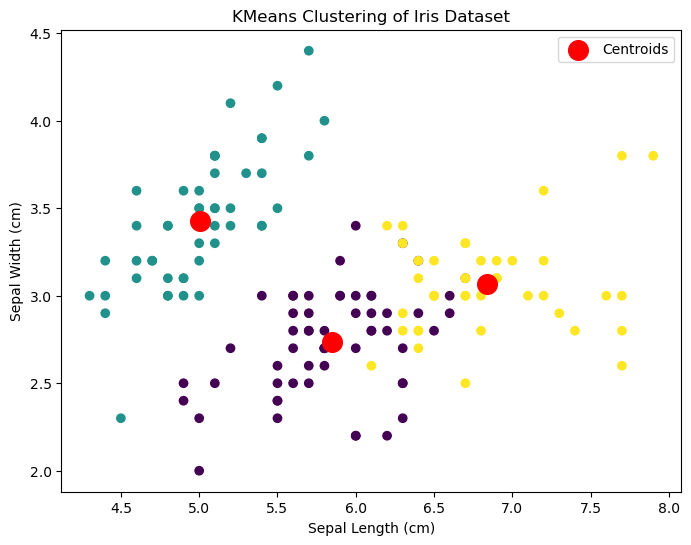

In [34]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KMeans Clustering of Iris Dataset')
plt.legend()
plt.show()

In [36]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [38]:
# Hierarchical Clustering Explained
# Hierarchical clustering builds a hierarchy of clusters. It can be agglomerative
# (bottom-up) or divisive (top-down). Agglomerative clustering starts with each point
# as a separate cluster and iteratively merges the closest clusters until a single
# cluster remains. The result is a dendrogram that visualizes the cluster hierarchy.

# Suitability for Iris Dataset
# Hierarchical clustering is suitable for the Iris dataset because it can reveal
# the relationships between clusters and identify subclusters within larger clusters. 
# The dendrogram visualization helps understand the hierarchy of clusters, offering 
# more insights than just the final cluster assignments.


In [42]:
# Apply Agglomerative Clustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = hierarchical_cluster.fit_predict(iris_df)

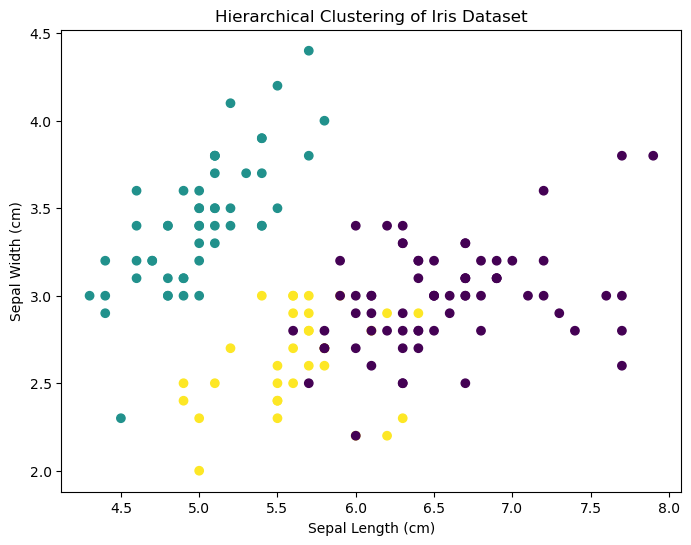

In [44]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=labels, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Hierarchical Clustering of Iris Dataset')
plt.show()

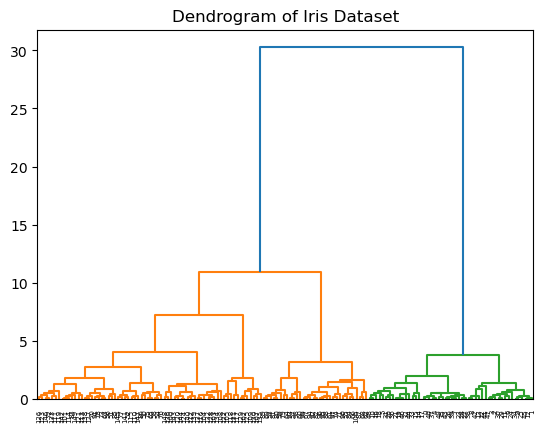

In [46]:
# Visualize the dendrogram
linked = linkage(iris_df, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram of Iris Dataset')
plt.show()